<a href="https://colab.research.google.com/github/colaresm/Intelig-ncia_computacional_aplicada/blob/main/HW1_An%C3%A1lise_estat%C3%ADstica_das_caracter%C3%ADsticas_dos_abalones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm 
import seaborn as sns
from scipy.stats import skew

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
variaveis = ['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Class_number_of_rings']
path ="/content/drive/MyDrive/datasets_ml/abalone_csv.csv"
dados = pd.read_csv(path)

**O que são abalones?** <br>
O Abalone é um molusco comestível, um gastrópode de concha única encontrado nas águas costeiras de boa parte do planeta. Porém, o abalone vermelho é o maior e mais desejado de todos, mas só pode ser encontrado na costa oeste da América do Norte.

**Análise univariada** <br>
Inicialmente faz-se uma descrição dos dados e suas características em termos de número de observações $ N $, número de variáveis ​​preditoras $ D $, número de classes $ L $ e distribuição de classe (isto é, o número de observações para cada uma das classes).





In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    4177 non-null   object 
 1   Length                 4177 non-null   float64
 2   Diameter               4177 non-null   float64
 3   Height                 4177 non-null   float64
 4   Whole_weight           4177 non-null   float64
 5   Shucked_weight         4177 non-null   float64
 6   Viscera_weight         4177 non-null   float64
 7   Shell_weight           4177 non-null   float64
 8   Class_number_of_rings  4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
dados.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
dados.groupby('Sex')[variaveis].count().sort_values(variaveis[-1])

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
Sex,,,,,,,,
F,1307,1307,1307,1307,1307,1307,1307,1307
I,1342,1342,1342,1342,1342,1342,1342,1342
M,1528,1528,1528,1528,1528,1528,1528,1528


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


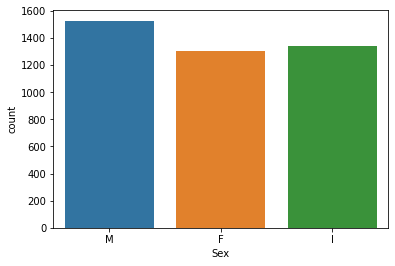

In [9]:
plt.figure()
_ = sns.countplot(dados['Sex'])

Cada preditor possui **4177** observações e **3** classses(Masculino, Feminino e Infantil).Agora iremos observar as distribuições dos dados por meio de **histrogramas**:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


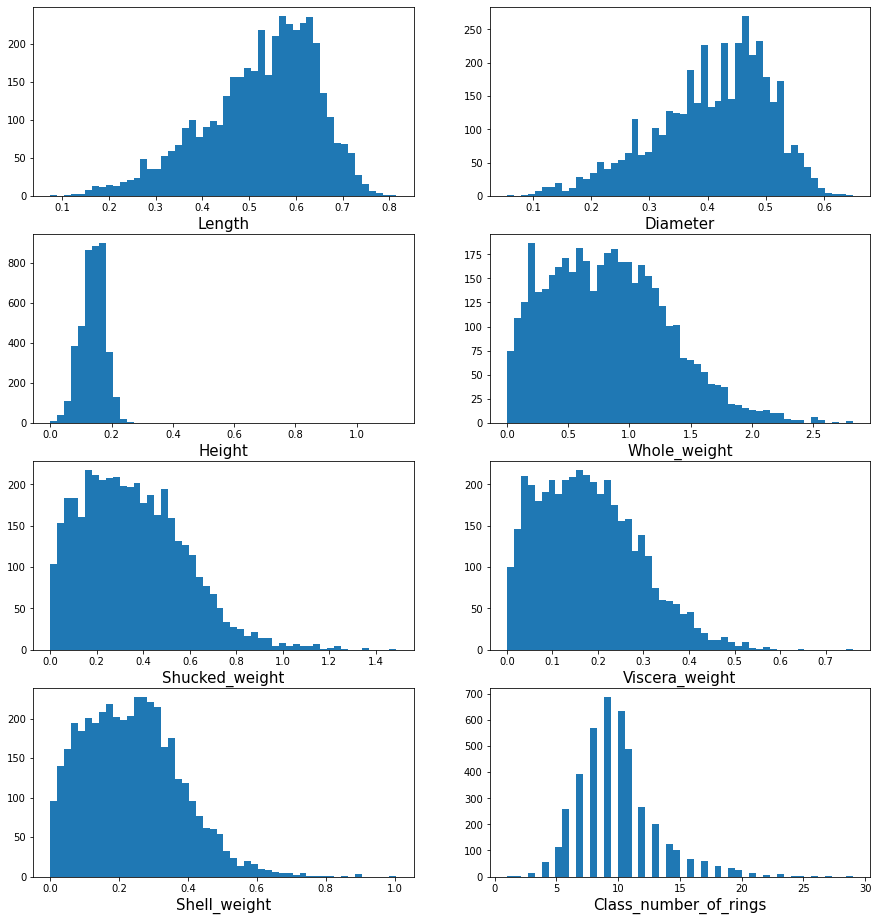

In [10]:
colors = sns.color_palette("Paired")
plt.figure(figsize=(15, 16))
for i in range(0,8):     
     plt.subplot(4, 2, i+1)
     sns.distplot(dados[variaveis[i]],bins=50,color=colors[1],kde=False,hist_kws=dict(alpha=1))
     plt.xlabel(variaveis[i],fontsize=15)

Como é possível observar visualmente, as distribuições possuem assimetrias, para verificar isso fazemos o cálculo da ***skewness***, que consiste uma medida da assimetria de uma dada distribuição de probabilidade de uma variável aleatória avaliada em real em relação à sua média. O valor de assimetria pode ser positivo, zero, negativo ou indefinido.
 $$
S=  \frac{\frac{1}{N}\sum_{i=1}^{N}\left ( x_i-\bar{x} \right )^{3}}{\sigma^3}  
 $$
onde:

*   $S$: skewness ou assimetria
*   $x_i$: i-ésima amostra do preditor $X$
*   $\bar{x}$: média do preditor 
*   $\sigma$: Desvio padrão do preditor

Sobre os valores de $S$ podemos concluir que:

* $S<0$: A distribuição possui uma maior quantidade de amostras inferiores a média
* $S>0$: A distribuição possui uma maior quantidade de amostras superiores a média 
* $S=0$: A distribuição é simetrica em relação a média

a tabela a seguir possui a média de cada preditor bem como o seu desvio padrão e ***skewness***:

In [11]:
datao = { 
    'média': dados.mean(),
     'desvio padrão': dados.std(),
    'skew': dados.skew(),
 }
dF = pd.DataFrame(datao, columns= ['média','desvio padrão','skew'])
dF

,média,desvio padrão,skew
Length,0.523992,0.120093,-0.639873
Diameter,0.407881,0.099240,-0.609198
Height,0.139516,0.041827,3.128817
Whole_weight,0.828742,0.490389,0.530959
Shucked_weight,0.359367,0.221963,0.719098
Viscera_weight,0.180594,0.109614,0.591852
Shell_weight,0.238831,0.139203,0.620927
Class_number_of_rings,9.933684,3.224169,1.114102


Conforme podemos observar,  verifica-se a existência de distribuições não simétricas. A seguir observaremos os **boxplots** de cada preditor, esse tipo de gráfico é útil para mostrar a presença de ***outliers***:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

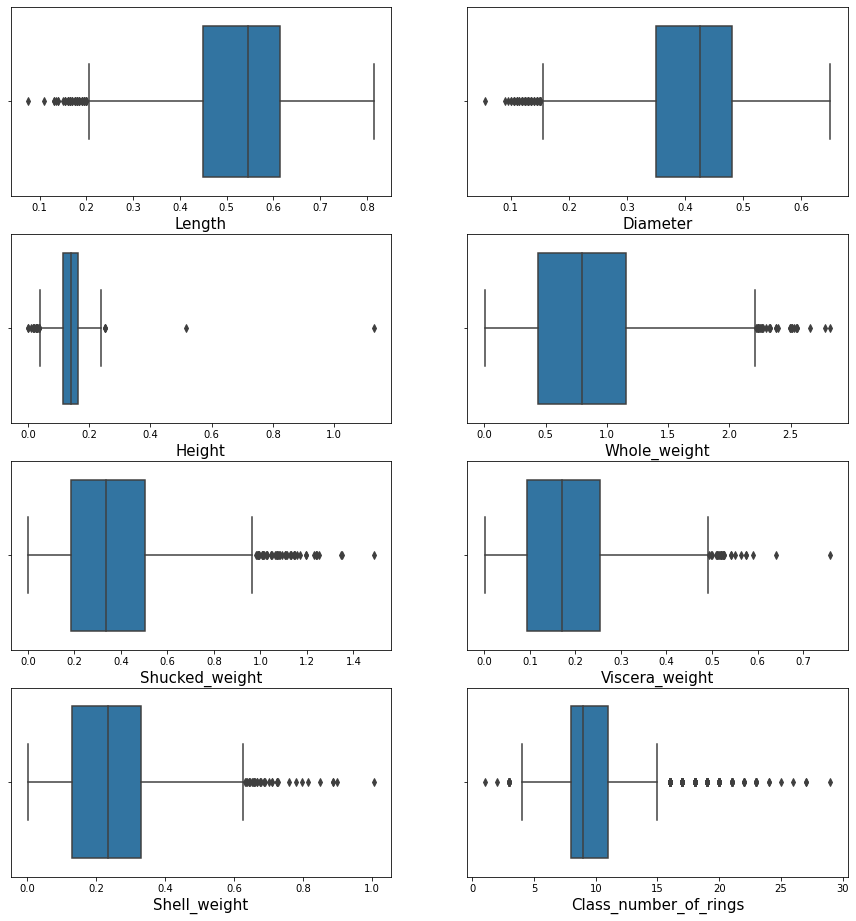

In [ ]:
plt.figure(figsize=(15, 16))
colors = sns.color_palette()
for i in range(0,8):
     
    plt.subplot(4, 2, i+1)
    _ = sns.boxplot(dados[variaveis[i]], color=colors[0 % 8])
    plt.xlabel(variaveis[i],fontsize=15)

Conforme podemos observar, existem alguns pontos  bem distântes da média, especialmente no preditor altura (***Height***). Agora iremos verificar como as distribuições de cada classe se comportam e se é possuível fazer uma distinção entre elas:

In [12]:
dados_M = dados[dados["Sex"] == 'M']
dados_F = dados[dados["Sex"] == 'F']
dados_I = dados[dados["Sex"] == 'I']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


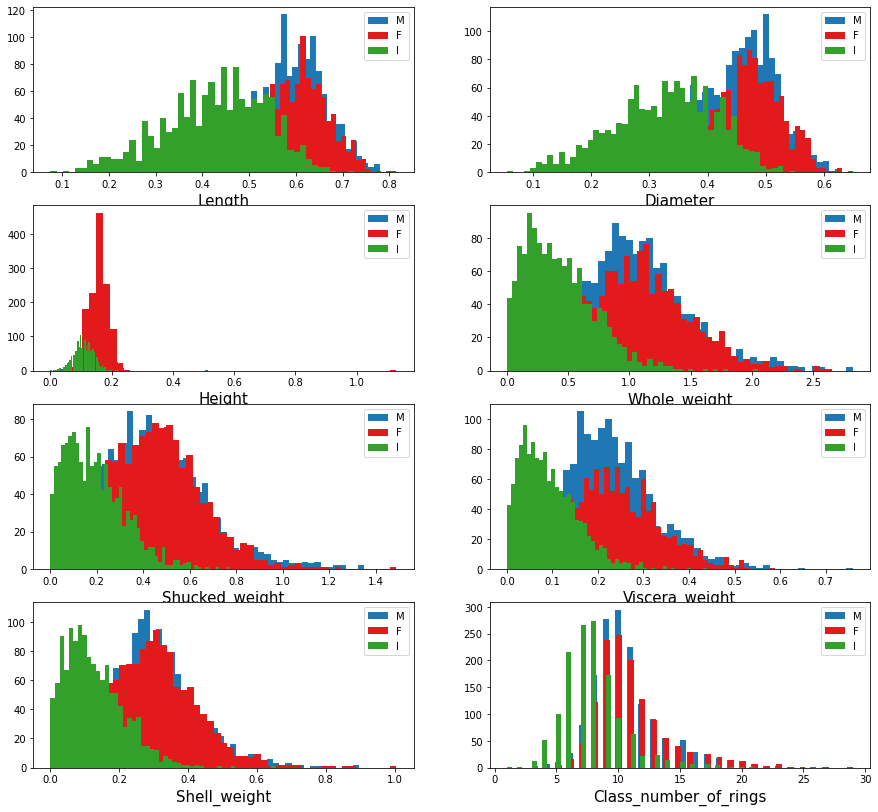

In [ ]:
colors = sns.color_palette("Paired")
plt.figure(figsize=(15, 14))
for i in range(0,8):     
     plt.subplot(4, 2, i+1)
     sns.distplot(dados_M[variaveis[i]],bins=50,color=colors[1],kde=False,hist_kws=dict(alpha=1),label='M')
     sns.distplot(dados_F[variaveis[i]],bins=50,color=colors[5],kde=False,hist_kws=dict(alpha=1),label='F')
     sns.distplot(dados_I[variaveis[i]],bins=50,color=colors[3],kde=False,hist_kws=dict(alpha=1),label='I')
     plt.xlabel(variaveis[i],fontsize=15)
     plt.legend()

In [13]:
data = { 
    'mean-M': dados_M.mean(),
     'mean-F': dados_F.mean(),
    'mean-I': dados_I.mean(),
    'std-M': dados_M.std(),
    'std-F': dados_F.std(),
    'std-I': dados_I.std(),
 'skew-M': dados_M.skew(),
    'skew-F': dados_F.skew(),
    'skew-I': dados_I.skew(),
 }
dF = pd.DataFrame(data, columns= ['mean-M','mean-F','mean-I', 'std-M', 'std-F', 'std-I','skew-M','skew-F','skew-I'])
dF

,mean-M,mean-F,mean-I,std-M,std-F,std-I,skew-M,skew-F,skew-I
Length,0.561391,0.579093,0.427746,0.102697,0.086160,0.108858,-0.913565,-0.528735,-0.346951
Diameter,0.439287,0.454732,0.326494,0.084398,0.070954,0.088109,-0.923321,-0.506289,-0.292925
Height,0.151381,0.158011,0.107996,0.034804,0.039984,0.031995,0.417547,10.925682,-0.058515
Whole_weight,0.991459,1.046532,0.431363,0.470581,0.430316,0.286275,0.406007,0.368498,0.974459
Shucked_weight,0.432946,0.446188,0.191035,0.223000,0.198663,0.128405,0.632451,0.546770,0.865294
Viscera_weight,0.215545,0.230689,0.092010,0.104919,0.097617,0.062536,0.506076,0.393427,1.066459
Shell_weight,0.281969,0.302010,0.128182,0.130834,0.125649,0.084927,0.487628,0.691757,1.001923
Class_number_of_rings,10.705497,11.129304,7.890462,3.026349,3.104256,2.511554,1.255072,1.474022,1.326831


Verifamos então uma alta sobreposição entre as classes masculino e faminino, ao passo que a classe infantil aprensentou uma distriuição mais distinta das demais, então inicialmente pode-se pressupor que seria possível uma separação entre abalones infantis e adultos.

**Análise biavariada** <br>
Agora faremos uma análise **bivariada**, ou seja, vamos verificar como os preditores se comportam aos pares, inicialmente calcularemos a matriz de correlação para cada par. A matriz de correlação tem seu conteúdo composto pelos coeficientes de correlação dos pares $\rho_ {di, dj} $, com $ d_i $, $ d_j = 1,. . . , D $. 

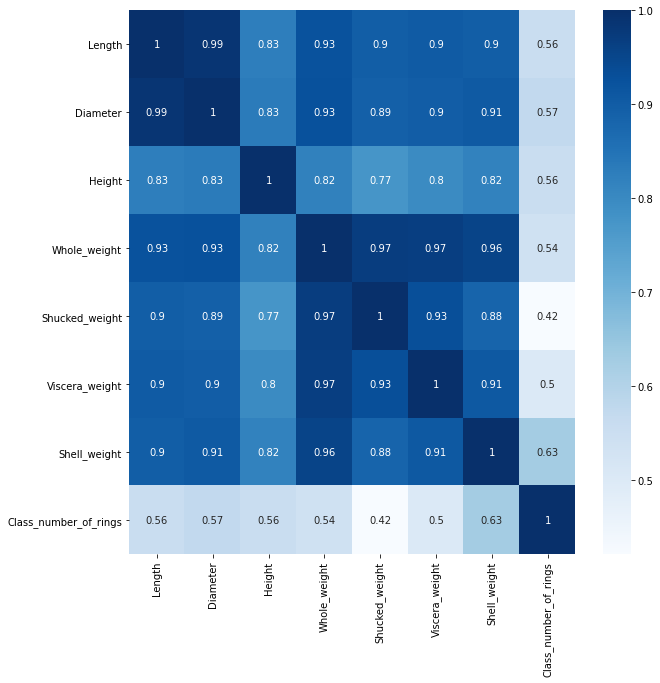

In [ ]:
plt.figure(figsize=(10, 10))
corr = dados.corr()
_ = sns.heatmap(corr, annot=True,cmap='Blues' )

Agora, vamos visualizar esses pares em gráficos de dispersão fazendo uma separação por classes:

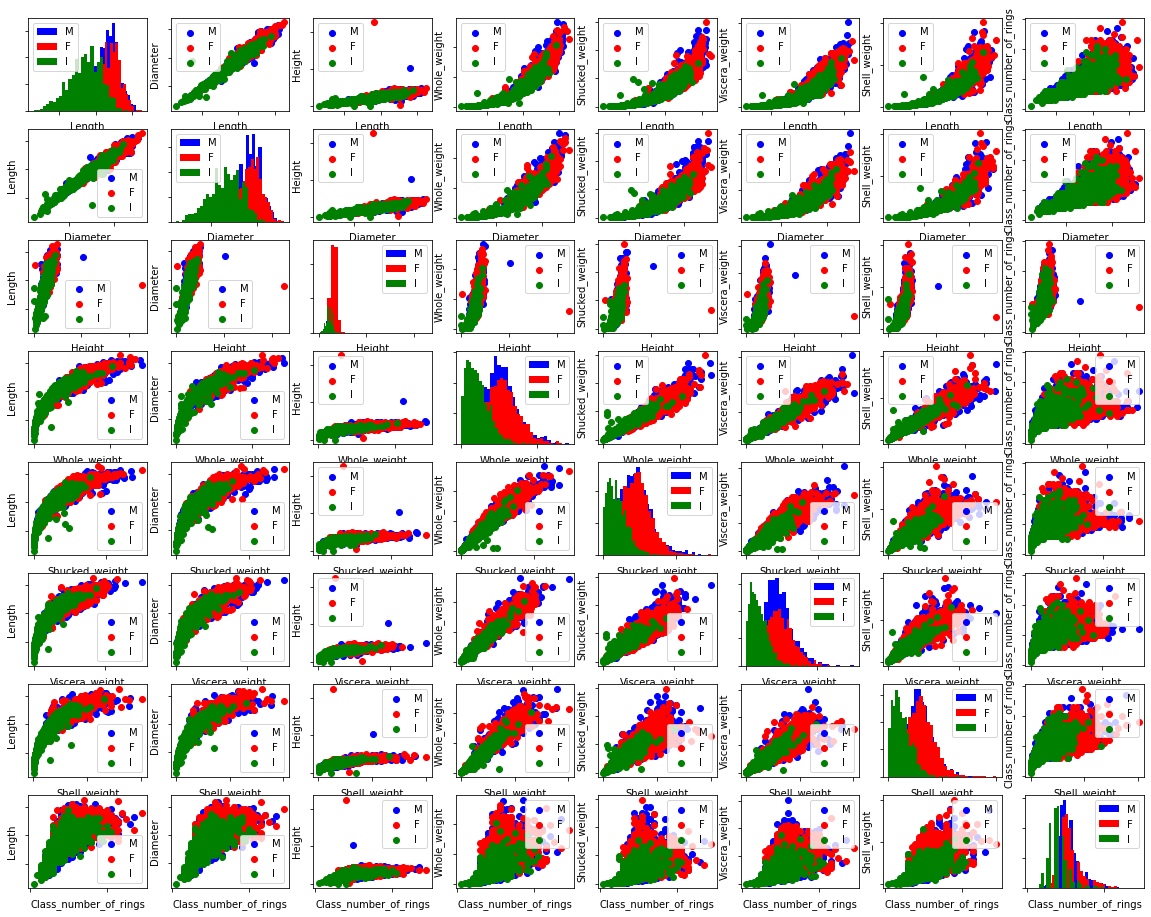

In [ ]:
fig, axs = plt.subplots(8,8,figsize=(20, 16))
for i in range(0,8):
    for j in range(0,8): 
        if(variaveis[i]==variaveis[j]):
            axs[i, j].hist(dados[dados["Sex"] == 'M'][variaveis[j]],label='M',bins=30,color='blue')
            axs[i, j].hist(dados[dados["Sex"] == 'F'][variaveis[j]],label='F',bins=30,color='red')
            axs[i, j].hist(dados[dados["Sex"] == 'I'][variaveis[j]],label='I',bins=30,color='green')
            axs[i, j].set(xlabel=variaveis[i]) 
            axs[i,j].set_xticklabels([])
            axs[i,j].set_yticklabels([])
            axs[i, j].legend()
        else:
            
            axs[i, j].scatter(dados[dados["Sex"] == 'M'][variaveis[i]],dados[dados["Sex"] == 'M'][variaveis[j]],label='M',color='blue')
            axs[i, j].scatter(dados[dados["Sex"] == 'F'][variaveis[i]],dados[dados["Sex"] == 'F'][variaveis[j]],label='F',color='red')
            axs[i, j].scatter(dados[dados["Sex"] == 'I'][variaveis[i]],dados[dados["Sex"] == 'I'][variaveis[j]],label='I',color='green')
            axs[i, j].set(xlabel=variaveis[i], ylabel=variaveis[j]) 
            axs[i,j].set_xticklabels([])
            axs[i,j].set_yticklabels([])
            axs[i, j].legend()

É notável a presença de comportatamentos aproximadamente lineares, o que explicaria a alta correlação, como o par ***Whole weight*** e ***Shell weight***, bem como a ocorrência de pares não-lineares como ***Shell weight*** e ***Diamerer***. Tais comportamentos podem ser explicados pelas relações físicas dos abalones. Por exemplo, é esperado que o peso total e peso da casca sejam diretamente proporcionais.

***Análise multivariada*** <br>

Agora faremos uma análise multivariada incondicional dos preditores.  Para isso iremos aplicar uma técnica de redução de dimensionalidade, ou seja, iremos gerar novos preditores que são combinações dos preditores originais, entretanto, o número de novos preditores será menor que a quantidade original. A técnica utilizada será a ***principal component analysis*** ou PCA (Análise das componentes pricipais).

PCA é uma técnica que possibilita a redução das dimensões de uma matriz de dados $\boldsymbol {X} $ de tamanho $ n\times p $. Entretanto, de certa forma, como características dos dados originais são preservadas. A primeira componente é combinação linear normalizada das variáveis ​​originais.

$$ Z_1 = \underbrace {\phi_ {11} X {_1} + \phi_ {2_1} X {_2} + \phi_ {p_1} X_ {p}} _ {\text {PC1}} \ $$
As componentes geradas apresentam uma maior variância. Os coeficientes possuem a seguinte limitação $\sum_ {j} ^ {p} \phi ^ {2} _ {ij} = 1 $. Aplicando-se uma ténica com 4 componentes, a seguir tem-se uma variância explicada por cada componente gerada.

 Entretanto, antes de fazermos isso devemos realizar um pré-processamento nos dados, uma vez que podem haver dados em escaladas diferentes, o que poderia fazer com o modelo desse mais peso a esses preditores, para isso faremos uso da transformação de Yeo-Johnson permite estabilizar a variância e aproximar os dados à distribuição normal, além de melhorar a correlação entre variáveis. Onde $y_i$ corresponde ao vetor de dados que será transformado e $\lambda$ pode ser qualquer número real.

$$
y_i^{\lambda }=\left\{\begin{matrix}
 \left (\left ( y_i+1 \right )^{\lambda } -1 \right )/\lambda  &amp; se \ \lambda  \neq 0,y\geq 0 \\ 
  log\left ( y_i +1 \right ) se \ \lambda = 0,y \geq  0 \\ 
-\left [\left ( -yi+1 \right )  ^{\left ( 2-\lambda \right )}-1\right ]/\left ( 2-\lambda \right ) &amp;  se \ \lambda  \neq 2,y &lt; 0       \\ 
 - log\left ( -y_i +1 \right ) &amp; se \ \lambda  = 2,y &lt; 0 
\end{matrix}\right.
$$

In [14]:
from scipy import stats
variaveis = ['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Class_number_of_rings']
LongestShell,x = stats.yeojohnson(dados['Length'])
Diameter,x = stats.yeojohnson(dados['Diameter'])
Height,x = stats.yeojohnson(dados['Height'])
WholeWeight,x = stats.yeojohnson(dados['Whole_weight'])
ShuckedWeight,x = stats.yeojohnson(dados['Shucked_weight'])
VisceraWeight,x = stats.yeojohnson(dados['Viscera_weight'])
ShellWeight,x = stats.yeojohnson(dados['Shell_weight'])
rings,x = stats.yeojohnson(dados['Class_number_of_rings'])

varss = { 
    variaveis[0]: LongestShell,
    'Diameter': Diameter,
     'Height': Height,
    'Diameter': Diameter,
     'Whole_weight': WholeWeight,
    'Shucked_weight': ShuckedWeight,
     'Viscera_weight': VisceraWeight,
     'Shell_weight': ShellWeight,
      'Class_number_of_rings': rings,
   
 }
c = { 'LongestShell': np.array(LongestShell) }
dadosprocessados = pd.DataFrame(data=varss,columns=variaveis)

dadosprocessados

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,0.888380,0.664630,0.084098,0.420374,0.186795,0.088366,0.129183,2.986158
1,0.589568,0.411339,0.080161,0.204693,0.091304,0.045403,0.065112,2.198084
2,1.146789,0.833515,0.113927,0.525756,0.208463,0.117794,0.171306,2.448641
3,0.841390,0.664630,0.106738,0.421730,0.180515,0.098139,0.132872,2.556565
4,0.540196,0.389464,0.072138,0.187610,0.082811,0.037423,0.051937,2.198084
...,...,...,...,...,...,...,...,...
4172,1.281563,0.935469,0.134501,0.648221,0.277885,0.177890,0.196369,2.655567
4173,1.383701,0.900680,0.113927,0.691011,0.315217,0.164051,0.203442,2.556565
4174,1.425970,1.026069,0.159806,0.797388,0.357678,0.203143,0.231251,2.448641
4175,1.535268,1.063795,0.124395,0.757293,0.360231,0.189682,0.224432,2.556565


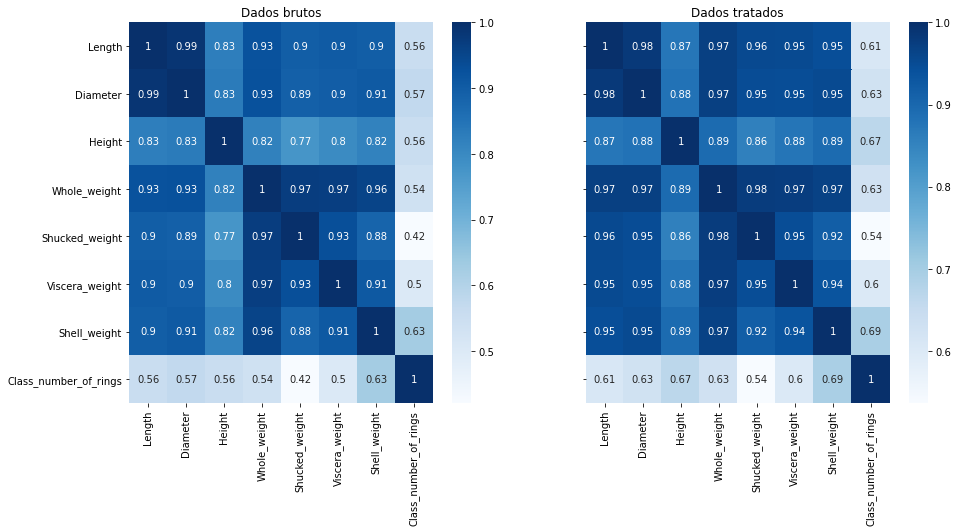

In [15]:

dadosprocessados['Sex'] = dados['Sex']
f,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(15, 7))
 
corr = dados.corr()
ax1.set_title('Dados brutos')
_ = sns.heatmap(corr, annot=True,cmap='Blues',ax=ax1)
ax2.set_title('Dados tratados')
corr = dadosprocessados.corr()
_ = sns.heatmap(corr, annot=True,cmap='Blues',ax=ax2)
 
 

In [ ]:
datao = { 
    'média': dadosprocessados.mean(),
     'desvio padrão': dadosprocessados.std(),
    'skew': dadosprocessados.skew(),
 }
dF = pd.DataFrame(datao, columns= ['média','desvio padrão','skew'])
dF

,média,desvio padrão,skew
Length,1.176540,0.420414,-0.066669
Diameter,0.830933,0.302483,-0.065977
Height,0.115751,0.028152,-0.115483
Whole_weight,0.580887,0.278332,-0.003980
Shucked_weight,0.253827,0.123921,0.027351
Viscera_weight,0.134930,0.067173,0.039780
Shell_weight,0.179761,0.086056,0.023390
Class_number_of_rings,2.505709,0.324150,0.004429


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


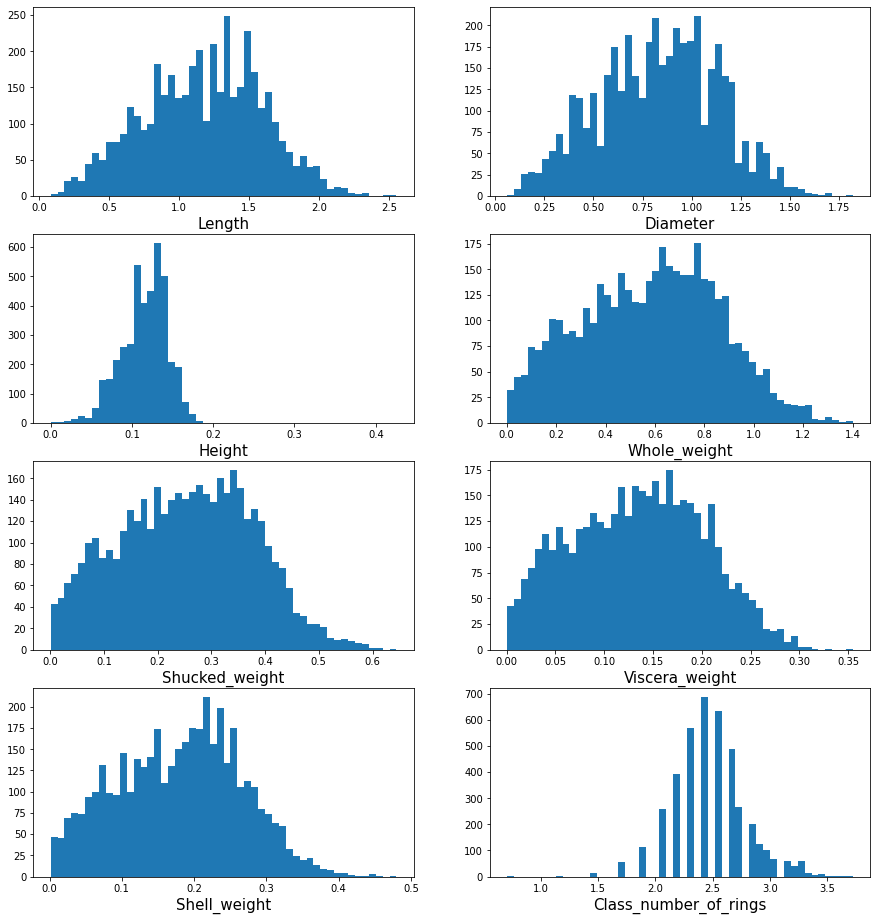

In [30]:
colors = sns.color_palette("Paired")
plt.figure(figsize=(15, 16))
for i in range(0,8):     
     plt.subplot(4, 2, i+1)
     sns.distplot(dadosprocessados[variaveis[i]],bins=50,color=colors[1],kde=False,hist_kws=dict(alpha=1))
     plt.xlabel(variaveis[i],fontsize=15)
plt.savefig("histogramasprocessados.pdf")

Observamos que após a aplicação da transformação os dados passam a ter uma maior simetria, se aproximando de uma distribuição normal. Também é possível notar uma melhoria na correlação entre alguns pares 

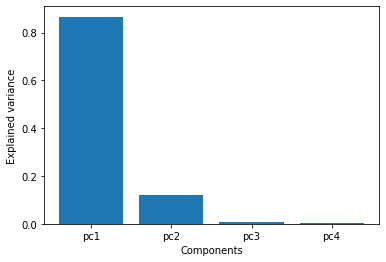

In [25]:
from sklearn.decomposition import PCA
X = dadosprocessados 
X = X.drop(columns=['Sex'])
pca = PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)
dadosPCA = pd.DataFrame(X, columns=['pc1','pc2','pc3','pc4'])
plt.bar(['pc1','pc2','pc3','pc4'],pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.savefig('varexplicada.pdf') 

In [19]:
def varpac(X,c):
    X = dadosprocessados 
    X = X.drop(columns=['Sex'])
    pca = PCA(n_components=c)
    pca.fit(X)
    vare=sum (pca.explained_variance_ratio_)
    return vare
varpac(X,3)
componentes=[1,2,3,4]

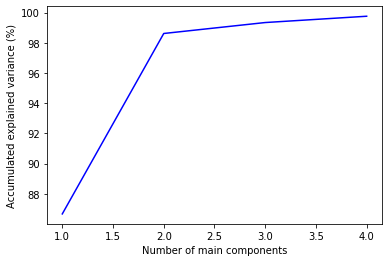

In [23]:
varacumulada = []
componentes=[1,2,3,4]
for i in range(0,len(componentes)):
    varacumulada.append(varpac(X,componentes[i]))
plt.plot(componentes,100 *np.array(varacumulada),color='b')
plt.xlabel('Number of main components')
plt.ylabel('Accumulated explained variance (%)')
plt.savefig('varacc.pdf')


**Componentes principais para as classes**

Text(0.5, 1.0, 'Masculino')

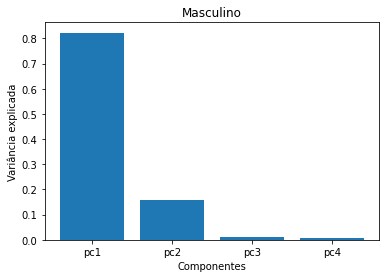

In [ ]:
from sklearn.decomposition import PCA
dadosprocessados['Sex'] = dados['Sex']
X =  dadosprocessados[dadosprocessados["Sex"] == 'M']
X = X.drop(columns=['Sex'])
pca = PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)
dadosPCA_M = pd.DataFrame(X, columns=['pc1','pc2','pc3','pc4'])
plt.bar(['pc1','pc2','pc3','pc4'],pca.explained_variance_ratio_)
plt.xlabel('Componentes')
plt.ylabel('Variância explicada')
plt.title('Masculino')

Text(0.5, 1.0, 'Feminino')

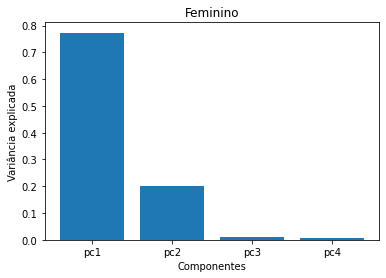

In [ ]:
from sklearn.decomposition import PCA
dadosprocessados['Sex'] = dados['Sex']
X =  dadosprocessados[dadosprocessados["Sex"] == 'F']
X = X.drop(columns=['Sex'])
pca = PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)
dadosPCA_F = pd.DataFrame(X, columns=['pc1','pc2','pc3','pc4'])
plt.bar(['pc1','pc2','pc3','pc4'],pca.explained_variance_ratio_)
plt.xlabel('Componentes')
plt.ylabel('Variância explicada')
plt.title('Feminino')

Text(0.5, 1.0, 'Infantil')

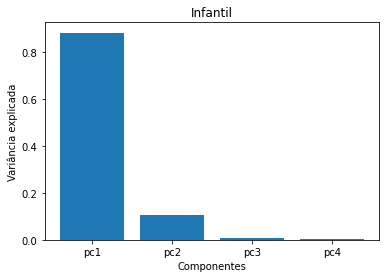

In [ ]:
from sklearn.decomposition import PCA
dadosprocessados['Sex'] = dados['Sex']
X =  dadosprocessados[dadosprocessados["Sex"] == 'I']
X = X.drop(columns=['Sex'])
pca = PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)
dadosPCA_I = pd.DataFrame(X, columns=['pc1','pc2','pc3','pc4'])
plt.bar(['pc1','pc2','pc3','pc4'],pca.explained_variance_ratio_)
plt.xlabel('Componentes')
plt.ylabel('Variância explicada')
plt.title('Infantil')


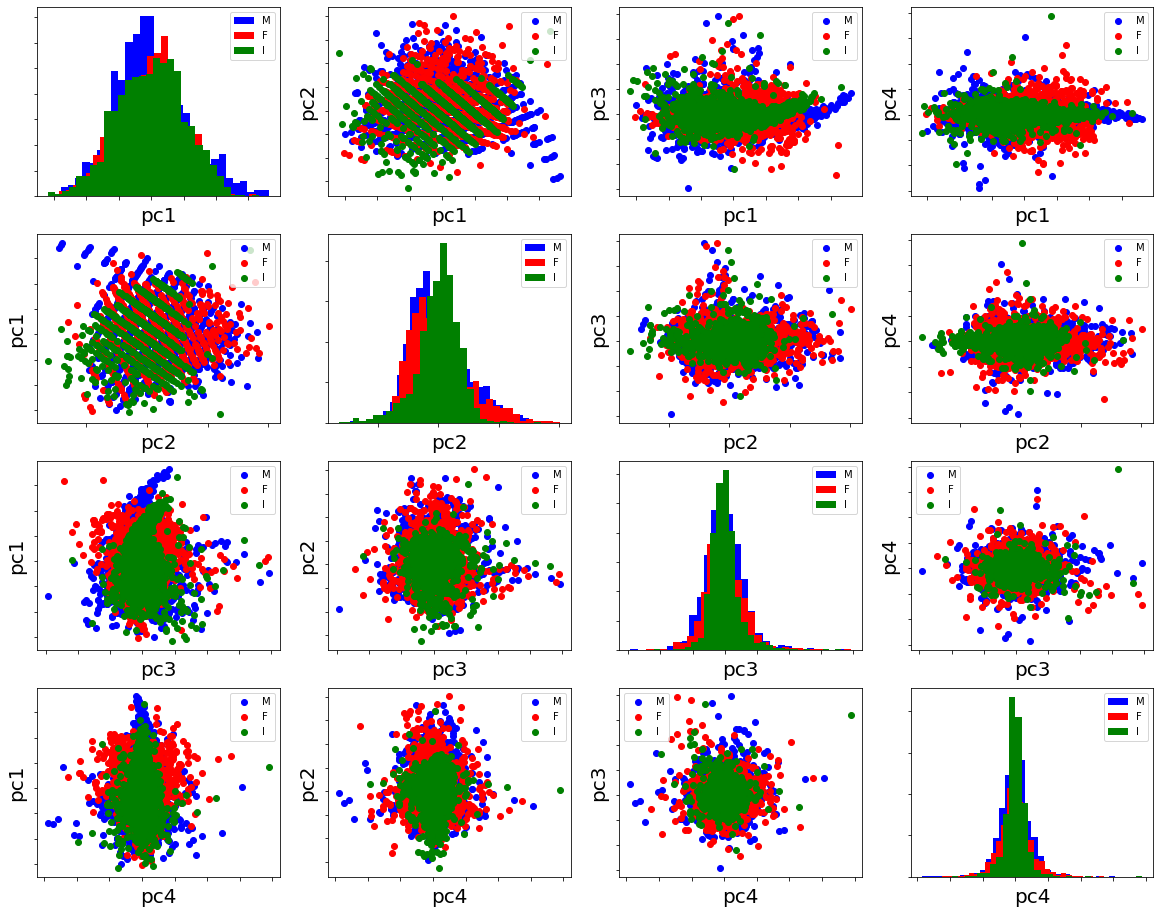

In [ ]:
varr =['pc1','pc2','pc3','pc4']
fig, axs = plt.subplots(4,4,figsize=(20, 16))
for i in range(0,4):
    for j in range(0,4): 
        if(varr[i]==varr[j]):
            axs[i, j].hist(dadosPCA_M[varr[j]],label='M',bins=30,color='blue')
            axs[i, j].hist(dadosPCA_F[varr[j]],label='F',bins=30,color='red')
            axs[i, j].hist(dadosPCA_I[varr[j]],label='I',bins=30,color='green')
            axs[i, j].set(xlabel=varr[i]) 
            axs[i, j].xaxis.label.set_size(20)
            axs[i,j].set_xticklabels([])
            axs[i,j].set_yticklabels([])
            axs[i, j].legend()
        else:
            
            axs[i, j].scatter(dadosPCA_M[varr[i]],dadosPCA_M[varr[j]],label='M',color='blue')
            axs[i, j].scatter(dadosPCA_F[varr[i]],dadosPCA_F[varr[j]],label='F',color='red')
            axs[i, j].scatter(dadosPCA_I[varr[i]],dadosPCA_I[varr[j]],label='I',color='green')
            axs[i, j].set(xlabel=varr[i], ylabel=varr[j])
            axs[i, j].xaxis.label.set_size(20)
            axs[i, j].yaxis.label.set_size(20)
            axs[i,j].set_xticklabels([])
            axs[i,j].set_yticklabels([])
            axs[i, j].legend()
#plt.savefig('plots/parespca.png')

Conforme pode-se observar, ocore uma alta sobreposição entre as componentes principais, o que invabiliza sua separação. Em particular a classe infantil encontra-se ligeiramente separada da masculina e feminina, seguerindo que  uma possível separação se daria entre adultos e infantis. 